In [2]:
import numpy as np
from numpy import exp, pi, cos, sqrt, arcsin
import matplotlib.pyplot as plt
from control import tf
# from matplotlib.widgets import Slider, Button, RadioButtons

In [6]:
c = 3e8

class Cavity():
    def __init__(self, L, r):
        r = np.array(r)
        self.loss = False
        self.cavity_length = L
        self.reflection_coef = r
        self.transmssion_coef = sqrt(1 - r*r)
#         self.input_wavelength = lamda # nm
#         self.input_freq = c / self.input_wavelength / 1e-9
    
    def lossless(self, freq):
        r1, r2 = self.reflection_coef
        t1, t2 = self.transmssion_coef
        L = self.cavity_length
        self.freq = freq
        k = 2*pi*self.freq/c
        self.tf = -t1*t2*exp(-1j * k*L) / (1 - r1*r2*exp(-2j *k*L)) 
        self.circ_power = t1**2 / (1 + r1**2 * r2**2 - 2*r1*r2*cos(2*k*L))
        self.reflected = (r1- r2*(r1**2+ t1**2)* exp(-2j*k*L)) / (1 - r1*r2*exp(-2j *k*L))
        
        self.fsr = c/2/L
        self.linewidth = 2*self.fsr/pi * arcsin((1 - r1*r2)/ (2*sqrt(r1*r2)))
        self.finesse = pi/ 2/arcsin((1 - r1*r2)/ (2*sqrt(r1*r2)))
        
    def plot(self):
        plt.plot(self.freq/1e3, np.abs(self.tf), label='transmitted')
        plt.plot(self.freq/1e3, np.abs(self.reflected), label='reflected')
        plt.plot(self.freq/1e3, sqrt(self.circ_power), label='circulating')
        plt.xlabel("frequency [kHZ]")
        plt.ylabel("Field amplitude")
        plt.legend()
        plt.show()
        
    

In [173]:
cavity.finesse

7.721928305545031

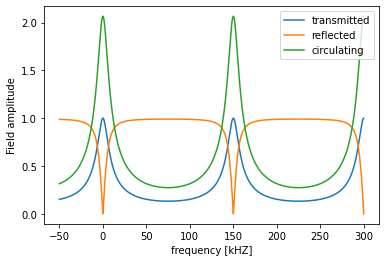

In [13]:
n1 = 1
n2 = 15
r1 = abs(n1 - n2)/ (n1 + n2); r2 = abs(n2 - n1)/(n1 + n2)
r = [r1, r2]

cavity = Cavity(1000, r)
freq = np.linspace(-50, 300, num=10000) * 1e3
cavity.lossless(freq)
cavity.plot()
